### NEURONS 

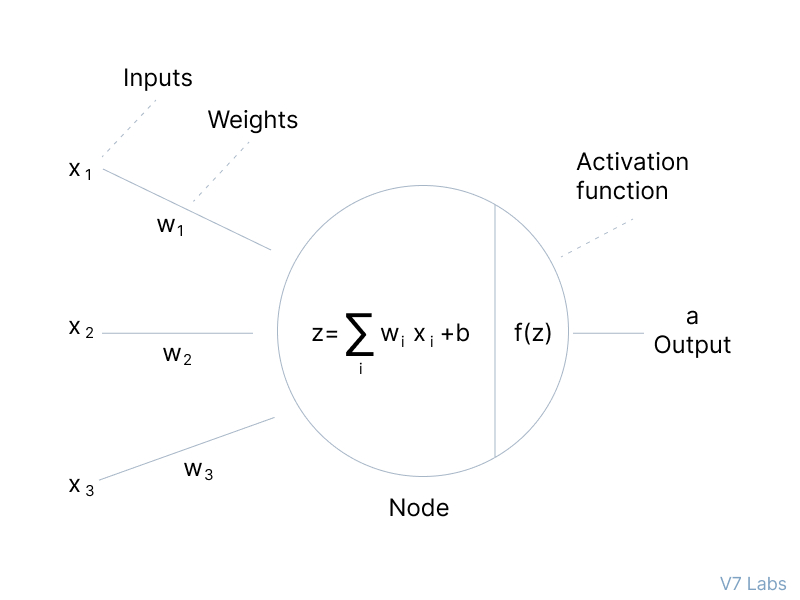

In [ ]:
#ImportError: Matplotlib requires numpy>=1.20; you have 1.19.5

#!pip3 uninstall numpy
#!pip3 install numpy --upgrade

Requirement already up-to-date: numpy in /Users/Sam/opt/anaconda3/lib/python3.9/site-packages (1.24.3)
You should consider upgrading via the '/Users/Sam/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [1]:

#import seaborn as sns
import numpy as np 
import pandas as pd
import math

import matplotlib.pyplot as plt 

### INPUTS and Targetted Outputs

In [11]:
feat_1 = [0.1,0.2,0.7,0.1]
feat_2 = [0.5,0.3,0.4,0.4]
feat_3 = [0.2,0.1,0.2,0.3]

target = [0,1,0,1]


In [12]:
df = pd.DataFrame({'X_1':feat_1,'X_2':feat_2,'X_3':feat_3,'target':target})
df.index.name ='Entries'
df

,X_1,X_2,X_3,target
Entries,,,,
0,0.1,0.5,0.2,0
1,0.2,0.3,0.1,1
2,0.7,0.4,0.2,0
3,0.1,0.4,0.3,1


#### WEIGHTS and BIAS

In [10]:
weights = [0.4,0.2,0.6]
bias = 0.5

#### CONTROL variables

In [13]:
epochCrossEnthropyRecords = [] # Record of Cross Enthropy per Epoch
lr = 0.001 #Learning Rate
max_crossEnthropy = 0.13 # Acceptable Cross Enthropy


#### ACTIVATION Functions

Here we are using a SIGMOID activation function with the equation:

$ {f(z)} = \frac{1}{1+ \exp(-{weightedsum})}$

##### NOTE: 
in the case of a PERCEPTRON, we could have used a binary step function:
$$
{f(x)} = \left\{
    \begin{array}{ll}
        0 & \mbox{for } {x}<Threshold \\
        1 & \mbox{x} \geq Threshold
    \end{array}
\right.
$$

In [ ]:
#1- Sigmoid
#w_sum: weighted sum

def sigmoid(w_sum):
    return 1/(1+math.exp(-w_sum))

#### NEURON Prediction

For 1 Entry, the ouput is the product ${Xi} \times {weight}$
The total output is the combinaison of all the sub-outputs: 
$\hat{Z} = weightedsum = \sum \limits _{j=0} ^{n} {X_{j}}{W}_{j} + bias $

FINAL OUTPUT:

$ \hat{Y}$ = $ {f(z)} = \frac{1}{1+ \exp(-{z})}$ 

In [ ]:
def neuron(entryFeatures):
    w_sum = 0 + bias
    for i,w in zip(entryFeatures,weights):
        w_sum += i*w
    #print('w_sum = ', w_sum)
    prediction = round(sigmoid(w_sum),2)
    #print('prediction =', prediction)
    return prediction

In [ ]:
def predict(df):
    predictionsList = []
    
    for i in range(0,df.shape[0]):
        pred = neuron(df.iloc[i])
        predictionsList.append(pred)
        
    return predictionsList

#### check prediction before weights update

In [ ]:


def checkPrediction():
    more_accurate_predictions = []
    for line in range(0,df.shape[0]):
        more_accurate_predictions.append(neuron(df.iloc[line,0:3]))

    return more_accurate_predictions



In [ ]:
checkPrediction()

[0.68, 0.67, 0.73, 0.69]

### OBSERVATION Before the weights are optimized: 
When the weights are not optimized the ouput don't match the desired outputs.

$0.68 \neq 0 $

$0.67 \neq 1 $

$0.73 \neq 0 $

$0.69 \neq 1 $


#### CROSS enthropy ( loss function)

Here we are evaluating how far the prediction is from the target.

An acceptable score is considered to be between [0 - 10%]

$ {CrossEnthropy} = - ( {target}.\log\hat{Y} + (1-target).(\log(1-\hat{Y}))$

In [ ]:
# Feature loss evaluation

def loss(target, prediction):
    loss= round(-(target*math.log10(prediction)+(1-target)*math.log10(1-prediction)),2)
    #print('loss:', loss)
    return loss

In [ ]:
def cross_enthropy(predictionsList):
    sum_loss = 0
    for i,p in enumerate(predictionsList):
        
        sum_loss+=loss(df.target[i],p)
    avg_loss = sum_loss/len(predictionsList)
    print('CROSS_ENTH = ', avg_loss)
    epochCrossEnthropyRecords.append(avg_loss)
    
    return avg_loss

#### WEIGHTS and Bias Optimization : Gradient Descend



${W'} = {W} + {\alpha}({y}-\hat{y})X_{i}$  
${bias'} = {bias} + {\alpha}({y}-\hat{y}) $

While the Error (crossEnthropy) is not minimized as desired, we will keep optimizing the weights.

Each round of weights optimization is called an Epoch.

In [ ]:
def optimize_weights():
    global bias
    predictionsList = predict(df)
    print('predictionsList: ', predictionsList)
    ce = cross_enthropy(predictionsList)
    
    while ce > max_crossEnthropy:
        #Gradient Descend on weights and bias
        for i,pred in enumerate(predictionsList):
            targ = df.target[i]
            
            #UPDATE WEIGHTS
            for j,ft in enumerate(df.iloc[i,:(df.shape[1]-1)]):
                weights[j] = weights[j] + lr*(targ-pred)*ft
                
            print('updated weights:', weights)

            #UPDATE BIAS
            bias = bias + lr*(targ-pred)
        
        predictionsList = predict(df)
        # print('predictionsList: ', predictionsList)
        ce = cross_enthropy(predictionsList)
        

In [1]:
optimize_weights()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


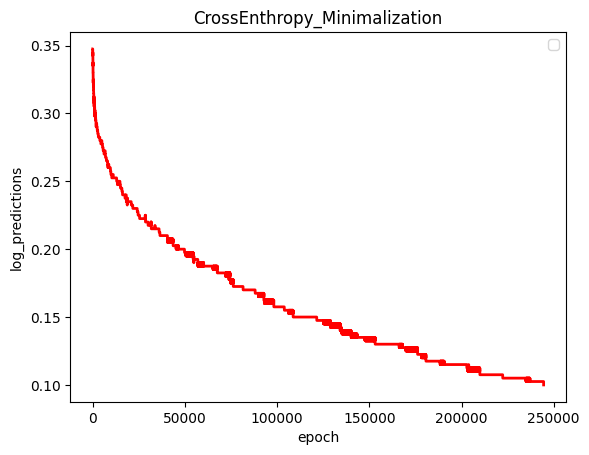

In [ ]:
fig, ax = plt.subplots()
epoch = [i for i in range(0,len(epochCrossEnthropyRecords))]
ax.plot(epoch, epochCrossEnthropyRecords, 'r-',linewidth=2)
ax.legend()
ax.set_title('CrossEnthropy_Minimalization')
ax.set_xlabel('epoch')
ax.set_ylabel('log_predictions')
plt.show()


#### Test with new updated weights


In [ ]:
checkPrediction()

[0.35, 0.83, 0.04, 0.77]

### OBSERVATION after the weight are optimized
We have limited the numbers of epoch to update the weights. We considered the error to be acceptable when Crossenthropy ~ 0.12

$ 0.35 \approx 0 $

$ 0.83 \approx 1 $

$ 0.04 \approx 0 $

$ 0.77 \approx 1 $


If we change the activation function to a Binary Step rather than Sigmoid, and set the threshold we can get a matching output.